Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part II: Instrumentation
[9.   Review on electrical circuits](#section_8)  

&nbsp;&nbsp;&nbsp;[9.1. Voltage dividers and impedance](#section_91)     
&nbsp;&nbsp;&nbsp;[9.2. Power sources and batteries](#section_92)     
&nbsp;&nbsp;&nbsp;[9.3. Passive circuit components](#section_93)   
&nbsp;&nbsp;&nbsp;[9.4. How to light up a LED](#section_94)   
&nbsp;&nbsp;&nbsp;[9.5. Low and high pass RC filters](#section_95)   
&nbsp;&nbsp;&nbsp;[9.6. Regulated voltage and current sources](#section_96)   
&nbsp;&nbsp;&nbsp;[9.7. Microprocessed power sources](#section_97)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [21]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 9. Review on electrical circuits  <a name="section_9"></a> 

### 9.1. Voltage dividers and impedance  <a name="section_91"></a> 


<img src="resources/VoltageDivider_2.png" alt="Voltage divider" width="240px"/>


In [22]:
Vin  = 5.                # logic level 5V
Z1   = 5000.             # top resistor
Z2   = 10000.            # bottom resistor
Vout = Vin*Z2/(Z1 + Z2)  # logic level ~3.3V

print('Logic level output: {0:5.2f}V'.format(Vout))

Logic level output:  3.33V


### 9.2. Power sources and batteries  <a name="section_92"></a> 

<img src="resources/Batt_LeadAcid.jpg" alt="Lead acid battery" width="400px"/>

<img src="resources/Batt_18650.jpg" alt="Lithium polimer battery" width="240px"/>

<img src="resources/InternalResistance_1.png" alt="Battery resistance" width="640px"/>


### 9.3. Passive circuit components  <a name="section_93"></a> 

#### 9.3.1. Resistors

$$ Z_R = R + 0i$$

<img src="resources/Resistors_2.jpg" alt="Types of resistors" width="640px"/>

<img src="resources/Resistors_1.jpg" alt="Resistors color code" width="280px"/>


#### 9.3.2. Capacitors

$$ Z_C = 0 - i \, \frac{1}{2\pi fC} $$

<img src="resources/Capacitors_1.jpg" alt="Types of capacitors" width="360px"/>

#### 9.3.3. Inductors

$$ Z_L = 0 + i \, 2\pi fL$$

<img src="resources/Inductors_0.jpg" alt="Types of inductors" width="640px"/>


### 9.4. How to light up a LED <a name="section_94"></a> 

<tr>
<td> <img src="resources/LED_example.gif" alt="Light up a LED" width="320px">    
<td> <img src="resources/LED_scheme.png"  alt="LED symbol"     width="240px">    
</tr>
    
<img src="resources/LEDVoltageByColor.png" alt="LED voltage drop" width="320px"/>  


In [23]:
V_resist = 9000 - 1800      # voltage after a RED resistor (mV)
I_light  = 15.              # light up current (mA)

R = V_resist/I_light        # required resistor value (ohm)

print('Required resistor value: {0:5.1f}Ω'.format(R))


Required resistor value: 480.0Ω


### 9.5. Low and high pass RC filters  <a name="section_95"></a>

For both low and high pass first order passive filters, with an association of a 
resistor and a capacitor, the cut off frequency is given by:

$$ f_{\rm 3dB} = \frac{1}{2\pi RC} $$

The _decibel_ is a measure of logarithmic relation to a reference value:

$$ {\rm dB} = 20 \log_{10} \left( \frac{V}{V_{\rm ref}} \right) $$

Some important dB values:

 |     dB  |  ~fraction |
 |:-------:|:----------:|
 |   −20   |    0.100   |
 |   −10   |    0.316   |
 |   −6    |    0.501   |
 |   −3    |    0.708   |
 |   +3    |    1.41    |
 |   +6    |    2.00    |
 |   +10   |    3.16    |
 |   +20   |    10.     |
 


In [24]:
e1 =  0.;  f1 = 10.**e1           #  frequency domain
e2 =  4.;  f2 = 10.**e2

N  =  1000
f  =  np.logspace(e1, e2, N)
w  =  2*np.pi*f

R  =  10.e03                      #  10 kiloOhm
C  =  0.1e-6                      #  100 nanoFaraday
ZC = -1j/(w*C)

f3dB =  1/(2*np.pi*R*C);          # -3dB frequency

print('Cut off frequency (-3dB): {0:7.2f}Hz'.format(f3dB))


Cut off frequency (-3dB):  159.15Hz


#### 9.5.1 Low pass

<img src="resources/LowPass_1.png" alt="Low pass filter" width="360px"/>


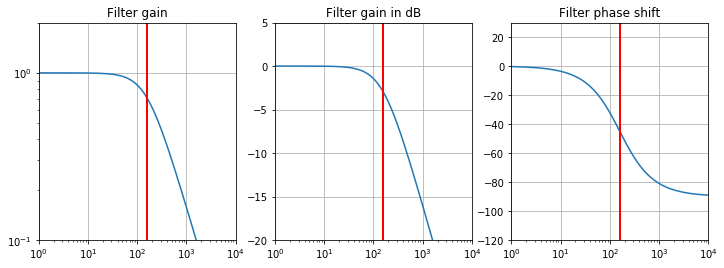

In [25]:
HLP   =  ZC/(R + ZC);
GLP   =  np.absolute(HLP);
dLP   =  20*np.log10(GLP);
pLP   =  180*np.angle(HLP)/np.pi;

fig1  =  plt.figure(1, figsize=(12,4));

sp11  =  plt.subplot(1,3,1)
sp11  =  plt.loglog(f,GLP);
sp11a =  plt.loglog([f3dB, f3dB], [0.1, 2], 'r', lw=2)
plt.title('Filter gain')
plt.axis([f1, f2, 0.1, 2]);
plt.grid(True); 
 
sp12  =  plt.subplot(1,3,2)
sp12  =  plt.semilogx(f,dLP);
sp12a =  plt.semilogx([f3dB, f3dB], [-20, 5], 'r', lw=2)
plt.title('Filter gain in dB')
plt.axis([f1, f2, -20, 5]);
plt.grid(True); 
 
sp13  =  plt.subplot(1,3,3)
sp13  =  plt.semilogx(f,pLP);
sp13a =  plt.semilogx([f3dB, f3dB], [-120, 30], 'r', lw=2)
plt.title('Filter phase shift')
plt.axis([f1, f2, -120, 30]);
plt.grid(True); 


Example: the low pass filtering capacitor for MEMS accelerometer ADXL203, with an output
resistor of 32kΩ. 


<img src="resources/ADXL203_photo.jpg" alt="ADXL203 photo" width="360px"/>

<img src="resources/ADXL203_internals.png" alt="ADXL203 internals" width="480px"/>


In [26]:
f3dB = 10.         # set -3dB cut off frequency
R    = 32000.      # internal output resistance

C    = 1/(2*np.pi*R*f3dB)

print('Minimum capacitor value: {0:7.2f}muF'.format(1e6*C))


Minimum capacitor value:    0.50muF


#### 9.5.2 High pass

<img src="resources/HighPass_1.png" alt="High pass filter" width="360px"/>


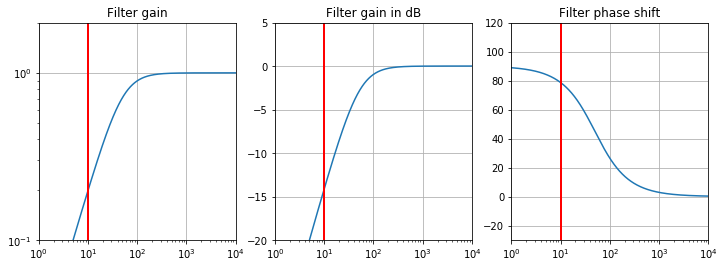

In [27]:
HHP   =  R/(R + ZC);
GHP   =  np.absolute(HHP);
dHP   =  20*np.log10(GHP);
pHP   =  180*np.angle(HHP)/np.pi;

fig1  =  plt.figure(1, figsize=(12,4));

sp11  =  plt.subplot(1,3,1)
sp11  =  plt.loglog(f,GHP);
sp11a =  plt.loglog([f3dB, f3dB], [0.1, 2], 'r', lw=2)
plt.title('Filter gain')
plt.axis([f1, f2, 0.1, 2]);
plt.grid(True); 
 
sp12  =  plt.subplot(1,3,2)
sp12  =  plt.semilogx(f,dHP);
sp12a =  plt.semilogx([f3dB, f3dB], [-20, 5], 'r', lw=2)
plt.title('Filter gain in dB')
plt.axis([f1, f2, -20, 5]);
plt.grid(True); 
 
sp13  =  plt.subplot(1,3,3)
sp13  =  plt.semilogx(f,pHP);
sp13a =  plt.semilogx([f3dB, f3dB], [-30, 120], 'r', lw=2)
plt.title('Filter phase shift')
plt.axis([f1, f2, -30, 120]);
plt.grid(True); 


### 9.6. Regulated voltage and current sources  <a name="section_966"></a> 

<img src="resources/LM7805_foto.jpg" alt="LM7805 photo" width="240px"/>

<img src="resources/LM7805_scheme.gif" alt="LM7805 schematics" width="540px"/>


### 9.7. Microprocessed power sources <a name="section_97"></a> 

<img src="resources/StepDown_1.png" alt="Step down microprocessor" width="640px"/>

<img src="resources/StepUp_1.png" alt="Step up microprocessor" width="640px"/>
